# Project Title: 

# Box Office Breakdown: Data-Driven Insights for Smarter Movie Production

## Collaborators
1. Olgah Omollo
2. Judah Odida
3. Agnes Chomba
4. Nick Mwai
5. Lukas Omonde
6. Derrick
7. Eric

Business Problem

With the rise of original content production by major entertainment companies, our organization is looking to enter the movie industry by launching a new film studio. However, as newcomers to this space, we lack insight into what drives box office success. This project aims to analyze current trends in the film industry to identify the types of movies that perform best financially. The goal is to provide data-driven, actionable recommendations that will guide the studio in making informed decisions about the kinds of films to develop and invest in.

##  Goals :
Are certain  movie directors more likely to have more revenue in the box office?

Which genres are more likely to  highest audience and critics ratings ?

Is there a relationship between the production_budget and revenue in worldwide gross?

Which original languages are more popular in screening in box office?





## Data

### Data Understanding 

The dataset was compiled from multiple reputable sources including:-

 •	Box Office Mojo

•	im.db (SQlite database)

•	Rotten Tomatoes

•	The tmdb movies

•	The tn_movies_budgets.



The primary goal of the analysis is to uncover meaningful trends in production budgets, gross earnings, and audience ratings. These insights will support strategic decision-making for a new movie studio, enabling it to identify profitable genres and themes. By aligning content production with market demand and audience preferences, the studio can optimize its investment and increase the likelihood of producing successful original video content.



### Loading Datasets

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pathlib import Path

%matplotlib inline

In [2]:
# Establish a connection to the database
conn = sqlite3.connect('Data/im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name


In [3]:
# Load the movies gross data into a DataFrame
bom=pd.read_csv("Data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
tmdb=pd.read_csv("Data/tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [5]:
# load the movie info data into a DataFrame
movie_info = pd.read_csv("Data/rt.movie_info.tsv", sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
# Load the reviews data into a DataFrame with a compatible encoding
reviews = pd.read_csv("Data/Rotten_tomatoes_critic_reviews.csv", sep='\t', encoding='ISO-8859-1')
reviews.head()

In [ ]:
#loading tmdb.movies data into a DataFrame
rt_movies = pd.read_csv("Data/rotten_tomatoes_movies.csv")
rt_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [ ]:
# load the tn.movie_budgets data into a DataFrame
tn_movie_budgets = pd.read_csv("Data/tn.movie_budgets.csv")
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Exploration
With all datasets successfully loaded using Pandas, we proceeded to explore the structure, quality, and contents of the data to better understand the variables and identify any potential issues. We employed built-in functions like .info(), .describe(), and .isnull().sum() to assess data types, summary statistics, and missing values across datasets. To enhance our analysis, we also utilized Data Wrangler, a powerful extension that offers a visual interface for profiling and cleaning data, as well as SQLite Viewer to inspect database files interactively. These tools allowed for a comprehensive and efficient exploration process, laying the groundwork for informed data cleaning and analysis.

After thorough discussion of the datasets, we carefully evaluated the available columns. Based on importance to our project goals and quality, we decided on a final set of columns that would be most effective for a meaningful analysis:

From rotten_tomatoes:

genres, tomatometer_rating, audience_rating
→ These columns help us evaluate which movie genres tend to receive the highest critical and audience ratings.
From tmdb:

language, popularity
→ These attributes allow us to investigate how a film's language impacts its popularity and, by extension, potential profitability.

From tn_movie_budgets:

production_budget, worldwide_gross
→ These financial figures are crucial for establishing the existence of relationship between production budgets and worldwide gross revenue.

From im.db:

Extracting and joining data across the directors, persons, and movie_basics tables
→ This allows us to match each director with the correct movie title, enabling the analysis of which directors tend to deliver high foreign box office success.


Key Notes

Rotten Tomatoes Dataset Replacement:
The original Rotten Tomatoes datasets lacked the audience ratings and critic ratings, making them unusable for merging. We replaced them with a more complete version from Kaggle.

Exclusion of Box Office Mojo & RT Critic Reviews:
We excluded the Box Office Mojo dataset due to redundancy with the more reliable The tn_movie_budgets dataset. Similarly, we skipped the RT Critic Reviews dataset, as all required ratings were already available in the Rotten Tomatoes Movies Info dataset.





### Data Cleaning and Preprocessing

### preparing original_Language vs popularity in tmdb_movies

The `original_language` column provides insights into which languages (such as English, Spanish, etc.) lead in box office performance, helping inform strategic decisions about which languages to focus on during production—whether to appeal to a global audience or target growing regional markets. Meanwhile, the `popularity` column reflects viewer interest and engagement, indicating which films are gaining attention and momentum. Analyzing both variables together can reveal trends linking language, audience interest, and the likelihood of box office success.


In [ ]:
tmdb.info()
# Check for missing values in tmdb DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


To begin the analysis, we examine the original_language and popularity columns from the tmdb.movies dataset. Both columns are complete, containing no missing values. As a result, no additional data cleaning or imputation is necessary for these variables, allowing us to proceed directly with exploration and analysis.

### Data cleaning for worldwide gross revenue from tn_movie_budgets 
To understand how directors influence box office revenue, we combined the cleaned Rotten Tomatoes and financial performance datasets with data extracted from the im.db database. This integration allows us to analyze the relationship between directors and the commercial success of their films, helping identify which directors consistently drive high revenues.

In [ ]:
# Check for missing values in tn_movie_budgets DataFrame
tn_movie_budgets.isnull().sum()


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The tn_movie_budgets DataFrame contains no missing values, allowing us to proceed directly with data preparation.

In [ ]:
# Select relevant columns and create a copy
budgets = tn_movie_budgets[['movie', 'worldwide_gross']].copy()

# Remove dollar signs and commas, then convert to numeric (float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Display the first 20 rows
budgets.head(20)

,movie,worldwide_gross
0,Avatar,2.776345e+09
1,Pirates of the Caribbean: On Stranger Tides,1.045664e+09
2,Dark Phoenix,1.497624e+08
3,Avengers: Age of Ultron,1.403014e+09
4,Star Wars Ep. VIII: The Last Jedi,1.316722e+09
5,Star Wars Ep. VII: The Force Awakens,2.053311e+09
6,Avengers: Infinity War,2.048134e+09
7,Pirates of the Caribbean: At Worldâs End,9.634204e+08
8,Justice League,6.559452e+08
9,Spectre,8.796209e+08


### Data Preparation to check the relationship between production budget and worldwide gross


In [ ]:
tn_movie_budgets.isnull().sum()  # Check for missing values in tn_movie_budgets DataFrame
# Check for missing values in tn_movie_budgets DataFrame    

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There were no missing values from the data set

In [ ]:
# Select relevant columns and copy them
data = tn_movie_budgets[['production_budget', 'worldwide_gross']].copy()

# Remove dollar signs and commas, then convert to numeric
data['production_budget'] = data['production_budget'].replace('[\$,]', '', regex=True).astype(float)
data['worldwide_gross'] = data['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

### Genre vs Audience ratings & Critic (Tomatometer rating) Rating
Understanding the relationship between film genres and audience ratings offers valuable insights into viewer preferences and box office trends. By analyzing how different genres are rated by audiences, we can identify which types of films resonate most with viewers and potentially drive higher box office performance. This information is crucial for head of departments when making strategic decisions about content creation, marketing, and target demographics.

In [ ]:
rt_movies.isnull().sum()  # Check for missing values in rt_movies DataFrame

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

The dataset contained missing values ranging from 1% to 9% across most columns, with the exception of critic_census, which had approximately 44% missing data. For the purpose of analyzing which genres resonate most with audiences, data cleaning involved dropping rows with missing values in the genre and audience_ratings columns to ensure the analysis was based on complete and reliable records.

In [ ]:
df=rt_movies[['genres', 'audience_rating','tomatometer_rating']].copy()
cleaned_df = df.dropna(subset=['audience_rating', 'genres','tomatometer_rating'])
cleaned_df.sort_index(inplace=True)
# Displaying the first few rows of the cleaned DataFrame
cleaned_df.head()

,genres,audience_rating,tomatometer_rating
0,"Action & Adventure, Comedy, Drama, Science Fic...",53.0,49.0
1,Comedy,64.0,87.0
2,"Comedy, Romance",53.0,67.0
3,"Classics, Drama",97.0,100.0
4,"Action & Adventure, Drama, Kids & Family",74.0,89.0


In [ ]:
# Split genres and explode so each row is a single genre
cleaned_df['genres'] = cleaned_df['genres'].str.split(',')
cleaned_df = cleaned_df.explode('genres')
cleaned_df['genres'] = cleaned_df['genres'].str.strip() 

# Group by genre and calculate average audience rating
genre_ratings = (
    cleaned_df.groupby('genres')['audience_rating']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

genre_ratings.head()

,genres,audience_rating
0,Anime & Manga,75.000000
1,Sports & Fitness,73.382857
2,Documentary,73.280102
3,Special Interest,71.985962
4,Classics,71.049787


## Data Analysis

## a) The top 5 most popular original languages at the box office

In [ ]:
# top 5 original languages in box office data
language_counts = tmdb['original_language'].value_counts().reset_index()
language_counts.columns = ['original_language', 'popularity']

language_counts.head()

,original_language,popularity
0,en,23291
1,fr,507
2,es,455
3,ru,298
4,ja,265


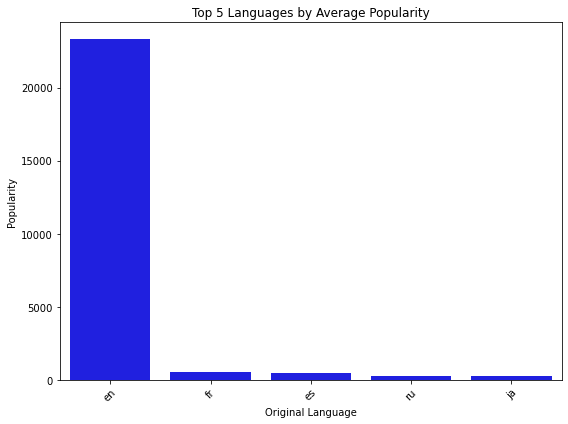

In [ ]:
#plotting a bar chart of top 5 popular original language movies
#Group by language and compute mean popularity


# Step 2: Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='original_language', y='popularity', data=language_counts.head(5),color="blue")
plt.title('Top 5 Languages by Average Popularity')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Results:
The bar chart reveals that the top five most popular original languages in films are English (en), French (fr), Spanish (es), Russian (ru), and Japanese (ja), respectively.

Recommendation:
Based on the analysis, it is recommended that movies be produced primarily in English (en), as it is the most dominant and popular original language in the box office market.

### b) Top 5 directors driving success in revenue at box office

In [ ]:
# Joining directors and movie_ratings tables to get average ratings and number of movies directed by each director
#joining directors and movie_ratings tables
results=conn.execute("""
SELECT DISTINCT 
    persons.primary_name AS Director_Name,
    movie_basics.original_title AS Movie
FROM directors
JOIN persons ON directors.person_id = persons.person_id
JOIN movie_basics ON directors.movie_id = movie_basics.movie_id;



             """).fetchall()
# Convert to DataFrame
df = pd.DataFrame(results, columns=["Director_Name", "movie"])

df.head()

,Director_Name,movie
0,Tony Vitale,Life's a Beach
1,Bill Haley,Steve Phoenix: The Untold Story
2,Jay Chandrasekhar,The Babymakers
3,Albert Pyun,Bulletface
4,Joe Baile,Bulletface


In [ ]:
df = df.drop_duplicates(subset=['movie', 'Director_Name'])
combined_df = pd.merge(df, budgets, on='movie', how='inner')
director_gross = combined_df.groupby('Director_Name')['worldwide_gross'].sum().reset_index()
director_gross = director_gross.sort_values(by='worldwide_gross', ascending=False)
director_gross['rank'] = director_gross['worldwide_gross'].rank(method='dense', ascending=False).astype(int)
# Display the top 10 directors by worldwide gross
director_gross.head(5)



,Director_Name,worldwide_gross,rank
209,Anthony Russo,3.902606e+09,1
1272,Joe Russo,3.902606e+09,1
2169,Pierre Coffin,3.713745e+09,2
515,Christopher Nolan,3.086180e+09,3
1420,Joss Whedon,2.992085e+09,4


Results:
The analysis shows that Anthony Russo and Joe Russo are the top directors in terms of generating high box office revenue. They are closely followed by Pierre Coffin, Christopher Nolan, and Joss Whedon.

Recommendation:
It is recommended that the studio prioritize working with proven high-revenue directors such as Anthony and Joe Russo. Additionally, exploring partnerships with other successful directors like Pierre Coffin, Christopher Nolan, and Joss Whedon could further enhance the studio’s chances of achieving box office success. Their track records indicate a strong ability to attract audiences and deliver commercially successful films

## c) Testing the relationship between production_budget and worldwide gross
To understand whether investing more in a movie’s production leads to higher box office returns, we conduct a hypothesis test examining the relationship between production budget and worldwide gross.

Null Hypothesis (H₀): Production budget has no effect on a movie’s box office performance.

Alternative Hypothesis (H₁): Production budget has an effect on a movie’s box office performance.

This analysis will help determine whether budget allocation is a key driver of revenue, guiding future investment decisions in movie production.

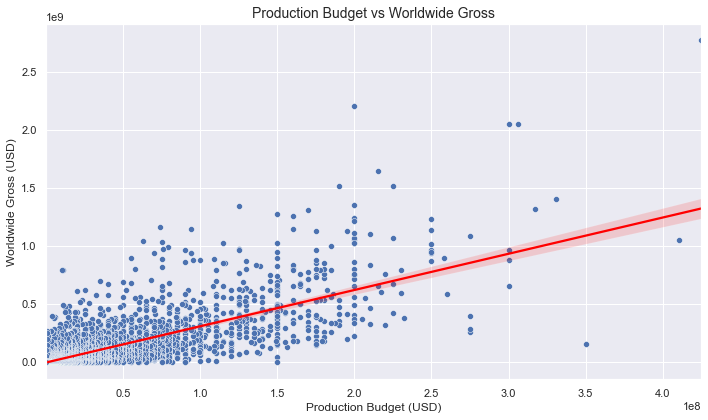

In [ ]:


# Create the scatter plot
plt.figure(figsize=(10, 6))  # Improves plot size/readability
sns.scatterplot(x=data['production_budget'], y=data['worldwide_gross'])

# Add regression line without replotting the scatter
sns.regplot(x=data['production_budget'], y=data['worldwide_gross'], scatter=False, color='red')

# Add plot title and labels
plt.title('Production Budget vs Worldwide Gross', fontsize=14)
plt.xlabel('Production Budget (USD)', fontsize=12)
plt.ylabel('Worldwide Gross (USD)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


We therefore plotted a scatter plot to visually assess the relationship between production budget and worldwide gross. The scatter plot helps reveal any potential linear trends or patterns in the data

Results: From the plot, we observed a positive correlation, suggesting that movies with higher production budgets tend to generate higher worldwide gross revenues.

### Introducing p-value and T-test statistics
To further validate the observed relationship between production budget and worldwide gross, we conducted a statistical test by calculating the p-value. This helps determine whether the relationship observed in the scatter plot is statistically significant or could have occurred by chance. We set the significance level (alpha) at 0.05, which is a common threshold in hypothesis testing.

In [ ]:
# calculating the t-test statistic value and p-value
t_statistic, p_value = stats.ttest_ind(data['production_budget'], data['worldwide_gross'], equal_var=False)
print(f"T-statistic: {t_statistic}, P-value: {p_value}")

T-statistic: -25.352947586831252, P-value: 2.985013602779577e-135


Results: Since the p-value (2.99e-135) is less than alpha (0.05), we reject the null hypothesis (H₀). This indicates that there is strong statistical evidence of a significant relationship between production_budget and worldwide_gross.

Recommendation:Given the strong statistical evidence supporting a significant relationship between production budget and worldwide gross, it is advisable for the new movie studio to allocate sufficient resources toward production. Higher budgets—when strategically invested—can lead to better box office performance, potentially through improved production quality, marketing, casting, or visual effects.

### d) Genre vs Audience ratings & Critic (Tomatometer rating) Rating


In [ ]:
# Filter top genres from the original DataFrame
top_genres = genre_ratings['genres']
genre_rating_df = cleaned_df[cleaned_df['genres'].isin(top_genres)].copy()

# Calculate the average of the two ratings
genre_rating_df['average_rating'] = genre_rating_df[['audience_rating', 'tomatometer_rating']].mean(axis=1)

# Sort by average rating
top_genres_df = genre_rating_df.sort_values('average_rating', ascending=False)

# Reshape the data to long format for Seaborn plotting
long_df = pd.melt(
    top_genres_df,
    id_vars='genres',
    value_vars=['audience_rating', 'tomatometer_rating'],
    var_name='rating_type',
    value_name='rating'
)

long_df['rating_type'] = long_df['rating_type'].map({
    'audience_rating': 'Audience',
    'tomatometer_rating': 'Critic'
})



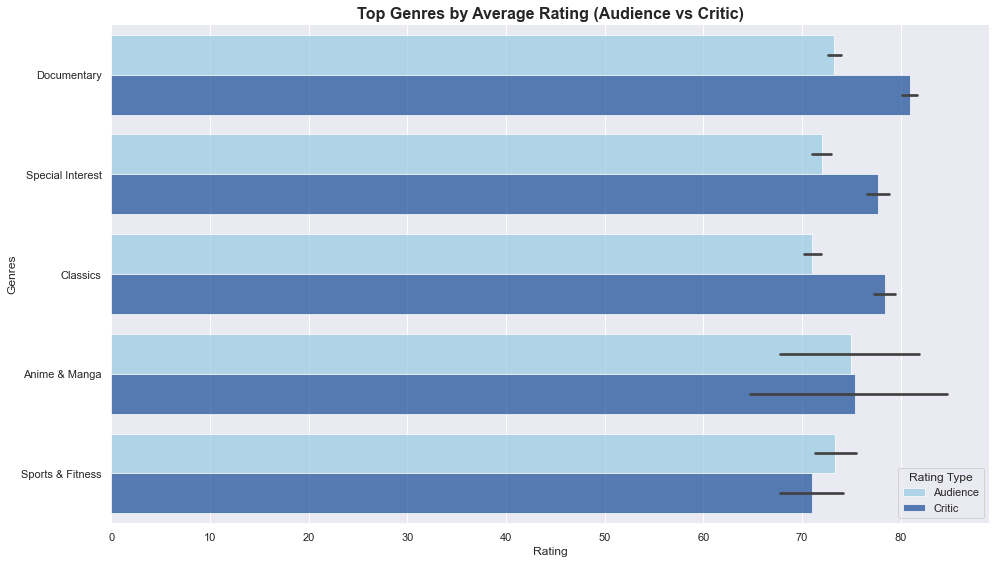

In [ ]:
sns.set(style='darkgrid')
plt.figure(figsize=(14, 8))

# Custom color palette
custom_palette = {
    'Audience': '#89CFF0',       # Light blue
    'Critic': '#0047AB'     # Dark blue
}

# Step 8: Horizontal barplot
sns.barplot(
    y='genres',
    x='rating',
    hue='rating_type',
    data=long_df,
    palette=custom_palette,
   
    alpha=0.7
)

# Step 9: Customize plot
plt.title('Top Genres by Average Rating (Audience vs Critic)', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.legend(title='Rating Type')
sns.despine(left=True, bottom=True)

# Final layout adjustments and display
plt.tight_layout()
plt.show()

Results: The horizontal bar chart compares Audience Ratings and Critic (Tomatometer) Ratings across the top five genres based on average scores:

Documentary stands out as the highest-rated genre by both audiences and critics, with critics showing slightly higher ratings than audiences.

Special Interest and Classics follow closely, with both groups rating these genres similarly high.

Anime & Manga shows a slight divergence—audiences tend to rate it lower than critics, though the error bars suggest greater variability in critic ratings.

Sports & Fitness receives relatively lower ratings from both audiences and critics compared to the other genres.

Insights: 

Critics tend to rate most genres slightly higher than general audiences.

The narrow error bars for genres like Documentary and Special Interest suggest more consistent opinions from critics and audiences.

Anime & Manga has the widest error margin, especially among critics, indicating a split in perception or variability in quality within the genre.

Recommendations:

The studio should consider investing in Documentary and Special Interest genres, as both critics and audiences highly rate them and show consistent favorability.

Classics also perform well and could be a safe creative investment, particularly for remakes or timeless themes.

Caution should be taken with Anime & Manga, as while critics show potential favorability, the wide variance implies inconsistent reception. Quality and execution will be key here.

Sports & Fitness could be explored with targeted storytelling or niche markets but may not guarantee high ratings.

### Exploring whether there is a Correlation Between Audience and Critic Ratings exists:
In the film industry, both audience and critic reviews play a crucial role in shaping a movie's reputation and commercial success. Understanding whether a correlation exists between audience ratings and critic (Tomatometer) ratings can help content creators, marketers, and studio executives align their strategies with viewer expectations and critical standards. In this analysis, we investigate the strength and nature of the relationship between these two key rating metrics to determine if films appreciated by critics are also well-received by audiences, and vice versa

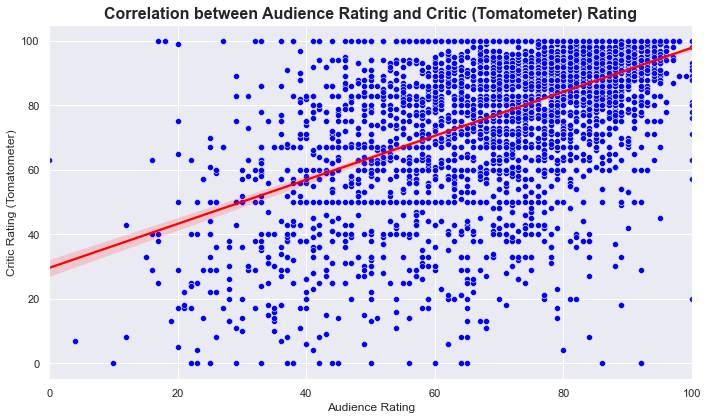

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=genre_rating_df,x='audience_rating',y='tomatometer_rating',color='blue')


# Create the scatterplot with a line of best fit
sns.regplot(data=genre_rating_df, x='audience_rating', y='tomatometer_rating', color="red", scatter=False)

# Add a title and labels
plt.title('Correlation between Audience Rating and Critic (Tomatometer) Rating', fontsize=16, weight='bold')
plt.xlabel('Audience Rating', fontsize=12)
plt.ylabel('Critic Rating (Tomatometer)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Results:The scatter plot reveals a strong positive relationship between audience ratings and critic (Tomatometer) ratings. This suggests that, generally, as audience ratings increase, critic ratings tend to increase as well. The clustering of data points along an upward trend line indicates a consistent agreement between the two groups — meaning that movies appreciated by audiences are also likely to be favored by critics. This correlation supports the idea that overall quality or appeal in film is often recognized similarly by both viewers and professional reviewers.

Recommendations

Invest in Quality Productions: Focus on producing films with strong scripts, compelling storytelling, and high production values, as these elements are likely to appeal to both critics and general audiences.

Use Audience Feedback as Early Indicator: Since audience reception aligns closely with critic scores, early audience testing and feedback can be a valuable predictor of critical success.

Align Marketing with Quality: Promote films that score highly with test audiences more aggressively, knowing they're likely to perform well critically — boosting word-of-mouth and long-term revenue.

Target Both Segments: Balance creative and commercial elements to ensure that the films resonate not just with the general public, but also meet critical standards for broader recognition and potential award considerations.

